[*********************100%***********************]  1 of 1 completed



--- Part A: Summary Statistics ---
               Statistic     Value
0       Last Price (ATM)  357.8000
1  Annualized Volatility    1.0554
2               Skewness   -7.0207
3               Kurtosis   50.8363
4           Observations   63.0000


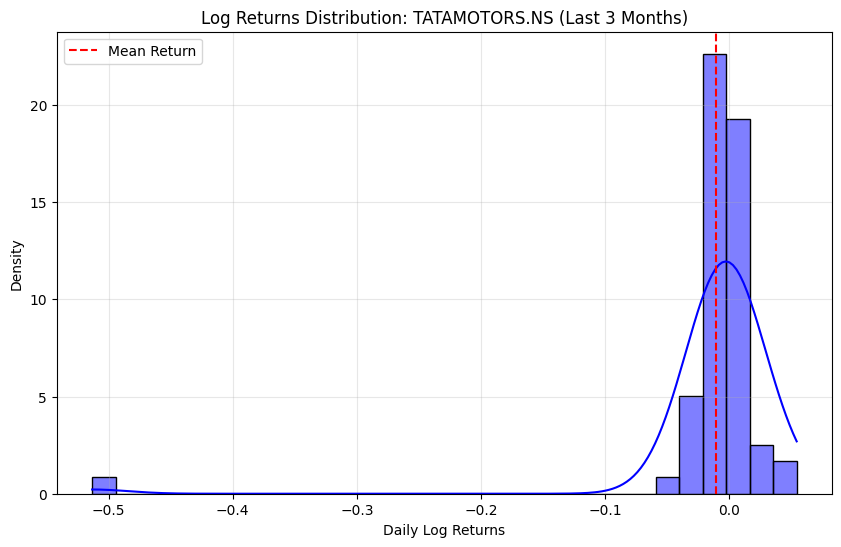

<Figure size 640x480 with 0 Axes>

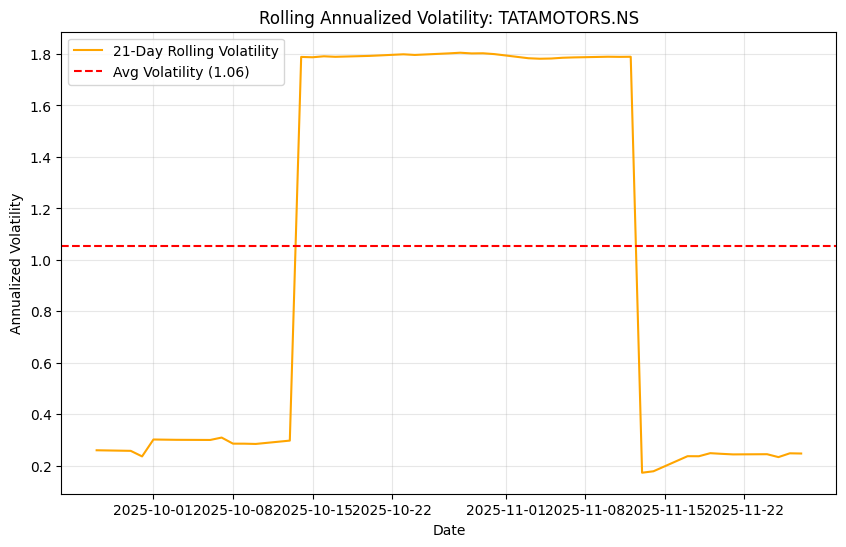

<Figure size 640x480 with 0 Axes>

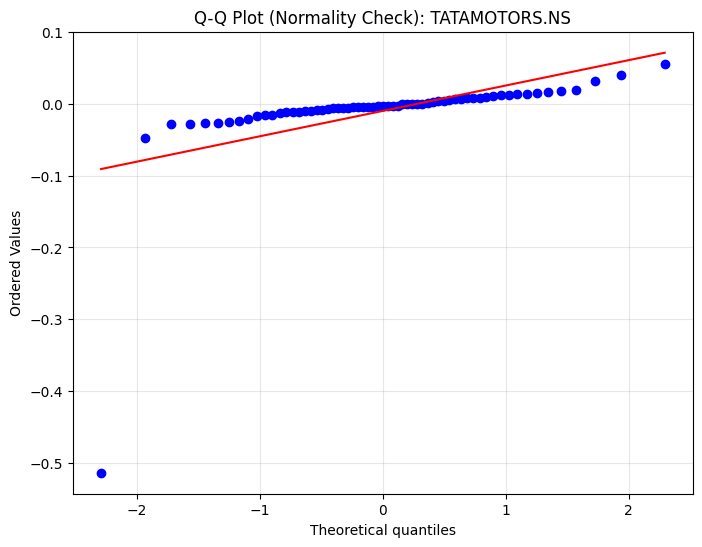

<Figure size 640x480 with 0 Axes>

In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import probplot

# --- Task 1 & 2: Data Extraction ---
ticker = "TATAMOTORS.NS"
print(f"Downloading data for {ticker}...")


stock_data = yf.download(ticker, period="3mo", interval="1d", auto_adjust=True)

if isinstance(stock_data.columns, pd.MultiIndex):
    try:
        stock_data = stock_data['Close']
    except KeyError:
        stock_data = stock_data.iloc[:, 0]
elif 'Close' in stock_data.columns:
     stock_data = stock_data['Close']
else:
    stock_data = stock_data.iloc[:, 0]


stock_data = stock_data.squeeze().dropna()

# --- Task 3: Compute Statistics ---
# 1. Daily Log Returns: ln(Pt / Pt-1)
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# 2. Annualized Volatility
daily_std = log_returns.std()
annualized_vol = daily_std * np.sqrt(252)

# 3. Skewness and Kurtosis
ret_skew = skew(log_returns.values)
ret_kurt = kurtosis(log_returns.values, fisher=True)

# Create a Summary Table
summary_stats = pd.DataFrame({
    "Statistic": ["Last Price (ATM)", "Annualized Volatility", "Skewness", "Kurtosis", "Observations"],
    "Value": [
        round(float(stock_data.iloc[-1]), 2),
        round(float(annualized_vol), 4),
        round(float(ret_skew), 4),  # Cast to float to fix the TypeError
        round(float(ret_kurt), 4),  # Cast to float to fix the TypeError
        len(log_returns)
    ]
})

print("\n--- Part A: Summary Statistics ---")
print(summary_stats)

# --- Deliverable: Plotting ---
#1. Plotting Log Returns Distribution
plt.figure(figsize=(10, 6))
sns.histplot(log_returns, kde=True, bins=30, color='blue', stat='density')
plt.title(f"Log Returns Distribution: {ticker} (Last 3 Months)")
plt.xlabel("Daily Log Returns")
plt.ylabel("Density")

plt.axvline(x=log_returns.mean(), color='r', linestyle='--', label='Mean Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("Log Returns Distribution.png")
plt.show()

# 2. Rolling Volatility Plot (Time-Series)
# This plot visualizes Annual Volatality changing over the course of time, for this we use a 21 day window ( which is approximately 1 trading month ) as the time frame
window_size = 21
rolling_vol = log_returns.rolling(window=window_size).std() * np.sqrt(252)

plt.figure(figsize=(10, 6))
plt.plot(rolling_vol, color='orange', label=f'{window_size}-Day Rolling Volatility')
plt.title(f"Rolling Annualized Volatility: {ticker}")
plt.xlabel("Date")
plt.ylabel("Annualized Volatility")
plt.axhline(annualized_vol, color='r', linestyle='--', label=f'Avg Volatility ({annualized_vol:.2f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("Rolling Volatility.png")
plt.show()

# 3.Q-Q Plot (Quantile-Quantile)
# To visualize Skewness and Kurtosis.
# (If dots curve away from the red line at the ends, it indicates "Fat Tails" (Kurtosis).)
# (If the curve is shaped like a bow/arch, it indicates Skewness.)
plt.figure(figsize=(8, 6))
probplot(log_returns, dist="norm", plot=plt)
plt.title(f"Q-Q Plot (Normality Check): {ticker}")
plt.grid(True, alpha=0.3)
plt.savefig("Q-Q Plot.png")
plt.show()